# Lidar

## Importar las librerías y módulos necesarios

In [1]:
import sys # System specific configuration
from pathlib import Path

# you can add to the Python path at runtime:
git_repo = 'E:/open-forestal-master' # windows, '/home/open-forestal-master' # linux
repo_path = Path(git_repo) 
module_path  = repo_path / 'Script' 

sys.path.insert(0, str(module_path))

import FlightPath as fp

Parametros del sensor LiDARit Explorer R 

In [2]:
v_fov = 30 # degree
h_fov = 90 # degree
PRF = 300000 # pulses per second, (320 kHz)

Parametros del vuelo de RPAS

In [3]:
h = 50 # Average flying height over ground, (m)
v = 5 # Flying speed over ground, (m/s)

E, N = 417900, 8632705
crs18Sepgs = 32718 # UTM 18S
azimuth = 98 # 163 degree

Instanciar clase

In [4]:
explorerR = fp.LidarUAV(v_fov, h_fov, PRF)

In [5]:
# Methods
explorerR.gFoV(h)

(99.99999999999999, 26.79491924311227)

In [6]:
explorerR.cornersCoordinates(h, E, N)

(417950.0,
 8632718.397459622,
 417850.0,
 8632718.397459622,
 417850.0,
 8632691.602540378,
 417950.0,
 8632691.602540378)

In [7]:
explorerR.rotateCorners(azimuth, *explorerR.cornersCoordinates(h, E, N))

(417906.3084214184,
 8632653.622030564,
 417920.2257315144,
 8632752.648837436,
 417893.6915785816,
 8632756.377969436,
 417879.7742684856,
 8632657.351162564)

Crear la huella y visualizarla.

In [8]:
# Flight Scan Footprint
vect_path = repo_path / 'Vector' / 'LiDARit_ExplorerR_footprint_h50.gpkg'
loc_cent_e, loc_cent_n = explorerR.polygonFootprint(str(vect_path), crs18Sepgs, *explorerR.cornersCoordinates(h, E, N))

Area (m**2) :  2679.491924494505
Centroids coordinates x,y :  417900.00000000006 8632705.0


C:\Users\PC\anaconda3\envs\osgeo_env\lib\site-packages\osgeo\osr.py:385: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


<bound method NDFrame.head of           Area                                           geometry
0  2679.491924  POLYGON Z ((417850.000 8632718.397 0.000, 4179...>
EPSG:32718


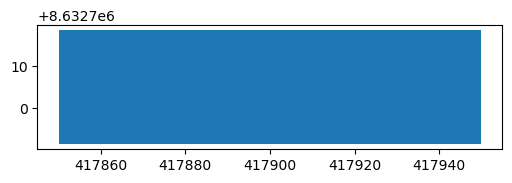

417900.00000000006 8632705.0
-12.367387007032503 -75.75520414944395


In [9]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

gdf = gpd.read_file(vect_path)
print(gdf.head)
print(gdf.crs)
gdf.plot(figsize=(6, 6))
plt.show()

from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326", always_xy=True)
print(loc_cent_e, loc_cent_n)

lon, lat = transformer.transform(loc_cent_e, loc_cent_n)
print(lat, lon)

In [10]:
# Add custom basemaps to folium
basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    )
}


m = folium.Map(location=[lat, lon], zoom_start=20)

# Add custom basemaps
basemaps['Google Satellite'].add_to(m)

# Use WGS 84 (epsg:4326) as the geographic coordinate system
gdf = gdf.to_crs(epsg=4326)
geo_j = gdf.to_json()
geo_j = folium.GeoJson(data=geo_j)
folium.Popup(gdf["Area"]).add_to(geo_j)
print(geo_j)

geo_j.add_to(m)

# Display the map.
display(m)

In [11]:
vect_path = repo_path / 'Vector' / 'LiDARit_ExplorerR_footprint_h50_az.gpkg'
explorerR.polygonFootprint(str(vect_path), crs18Sepgs, *explorerR.rotateCorners(azimuth, *explorerR.cornersCoordinates(h, E, N)))

Area (m**2) :  2679.491924434551
Centroids coordinates x,y :  417900.0 8632705.0


(417900.0, 8632705.0)

<bound method NDFrame.head of           Area                                           geometry
0  2679.491924  POLYGON Z ((417920.226 8632752.649 0.000, 4179...>
EPSG:32718


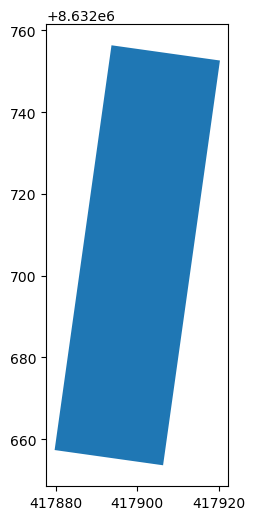

417900.00000000006 8632705.0
-12.367387007032503 -75.75520414944395


In [12]:
gdf = gpd.read_file(vect_path)
print(gdf.head)
print(gdf.crs)
gdf.plot(figsize=(6, 6))
plt.show()

from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326")
print(loc_cent_e, loc_cent_n)

lat, lon = transformer.transform(loc_cent_e, loc_cent_n)
print(lat, lon)

m = folium.Map(location=[lat, lon], zoom_start=20)

# Add custom basemaps
basemaps['Google Satellite'].add_to(m)

# Use WGS 84 (epsg:4326) as the geographic coordinate system
gdf = gdf.to_crs(epsg=4326)
geo_j = gdf.to_json()
geo_j = folium.GeoJson(data=geo_j)
folium.Popup(gdf["Area"]).add_to(geo_j)
print(geo_j)

geo_j.add_to(m)

# Display the map.
display(m)

UAV Lidar flight planner    

In [13]:
lidar_flight_plan = fp.UAV(*explorerR.gFoV(h, view=True)) # instanciar la clase para crear un objeto

PE = 50 # sidelap between flight strips

d_w = 300 # distance between two successive waypoints
d_w
spd = lidar_flight_plan.sidelap(PE) # separation distance between the flight strips (m)

49.99999999999999


In [14]:
# Flight path, Curved Turns Iterative # FIRST GRID

# Create list of coordinates
Ex = [E]
Nx = [N]
print(Ex, Nx)


Eo, No = lidar_flight_plan.cogo(E, N, d_w, azimuth)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)

ex, nx = lidar_flight_plan.curvedTurns(4, spd/2, Ex[len(Ex)-1], Nx[len(Nx)-1], azimuth)
print(ex, nx)
Ex.extend(ex)
Nx.extend(nx)
print(Ex, Nx)

Eo, No = lidar_flight_plan.cogo(Ex[len(Ex)-1], Nx[len(Nx)-1], d_w, azimuth + 180)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)

ex, nx = lidar_flight_plan.curvedTurns(4, spd/2, Ex[len(Ex)-1], Nx[len(Nx)-1], azimuth + 180, dr = 'CCW')
print(ex, nx)
Ex.extend(ex)
Nx.extend(nx)
print(Ex, Nx)

Eo, No = lidar_flight_plan.cogo(Ex[len(Ex)-1], Nx[len(Nx)-1], d_w, azimuth)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)

ex, nx = lidar_flight_plan.curvedTurns(4, spd/2, Ex[len(Ex)-1], Nx[len(Nx)-1], azimuth)
print(ex, nx)
Ex.extend(ex)
Nx.extend(nx)
print(Ex, Nx)

Eo, No = lidar_flight_plan.cogo(Ex[len(Ex)-1], Nx[len(Nx)-1], d_w, azimuth + 180)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)

ex, nx = lidar_flight_plan.curvedTurns(6, spd/2, Ex[len(Ex)-1], Nx[len(Nx)-1], azimuth + 180, dr = 'CCW')
print(ex, nx)
Ex.extend(ex)
Nx.extend(nx)
print(Ex, Nx)

Eo, No = lidar_flight_plan.cogo(Ex[len(Ex)-1], Nx[len(Nx)-1], d_w, azimuth)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)

ex, nx = lidar_flight_plan.curvedTurns(8, spd/2, Ex[len(Ex)-1], Nx[len(Nx)-1], azimuth)
print(ex, nx)
Ex.extend(ex)
Nx.extend(nx)
print(Ex, Nx)

Eo, No = lidar_flight_plan.cogo(Ex[len(Ex)-1], Nx[len(Nx)-1], d_w, azimuth + 180)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)


[417900] [8632705]
297.0804206224711 -41.75193028801961
[417900, 418197.0804206225] [8632705, 8632663.248069713]
1080 135.0 45.0 23.096988312782166 19.134171618254484
1
angle 120.5
16.486560227180682 -9.711326139738052
418213.56698084966 8632653.536743574
2
angle 165.5
4.790813967356934 -18.52470310280284
418218.357794817 8632635.012040472
3
angle 210.5
-9.71132613973805 -16.486560227180682
418208.64646867727 8632618.525480244
4
angle 255.5
-18.524703102802835 -4.790813967356944
418190.12176557444 8632613.734666277
[418213.56698084966, 418218.357794817, 418208.64646867727, 418190.12176557444] [8632653.536743574, 8632635.012040472, 8632618.525480244, 8632613.734666277]
[417900, 418197.0804206225, 418213.56698084966, 418218.357794817, 418208.64646867727, 418190.12176557444] [8632705, 8632663.248069713, 8632653.536743574, 8632635.012040472, 8632618.525480244, 8632613.734666277]
-297.0804206224711 41.751930288019636
[417900, 418197.0804206225, 418213.56698084966, 418218.357794817, 418208.6

In [15]:
flightPath_out = repo_path / 'Vector' / 'Lidar_flightPath_V01.gpkg'
lidar_flight_plan.flightPath(str(flightPath_out), crs18Sepgs, Ex, Nx)

417900 8632705
418197.0804206225 8632663.248069713
418213.56698084966 8632653.536743574
418218.357794817 8632635.012040472
418208.64646867727 8632618.525480244
418190.12176557444 8632613.734666277
417893.04134495195 8632655.486596564
417874.5166418491 8632650.695782596
417864.8053157094 8632634.209222369
417869.59612967673 8632615.684519267
417886.0826899039 8632605.973193128
418183.1631105264 8632564.22126284
418199.64967075357 8632554.509936702
418204.4404847209 8632535.9852336
418194.7291585812 8632519.498673372
418176.20445547835 8632514.707859404
417879.12403485586 8632556.459789691
417866.2795424965 8632554.882684337
417855.9444384917 8632547.094624856
417850.88800561335 8632535.182415497
417852.4651109677 8632522.337923137
417860.2531704487 8632512.002819132
417872.1653798078 8632506.946386253
418169.2458004303 8632465.194455966
418178.45493198035 8632461.97848326
418185.73236065754 8632455.483129827
418189.97016391583 8632446.69725435
418190.5231746249 8632436.958426725
418187.

In [31]:
# Flight path, Curved Turns Iterative # FIRST GRID

# Create list of coordinates
Ex = [E]
Nx = [N]
print(Ex, Nx)


Eo, No = lidar_flight_plan.cogo(E, N, d_w, azimuth)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)

ex, nx = lidar_flight_plan.curvedTurns(4, spd/2, Ex[len(Ex)-1], Nx[len(Nx)-1], azimuth, dr = 'CCW')
print(ex, nx)
Ex.extend(ex)
Nx.extend(nx)
print(Ex, Nx)

Eo, No = lidar_flight_plan.cogo(Ex[len(Ex)-1], Nx[len(Nx)-1], d_w, azimuth + 180)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)

ex, nx = lidar_flight_plan.curvedTurns(4, spd/2, Ex[len(Ex)-1], Nx[len(Nx)-1], azimuth + 180)
print(ex, nx)
Ex.extend(ex)
Nx.extend(nx)
print(Ex, Nx)

Eo, No = lidar_flight_plan.cogo(Ex[len(Ex)-1], Nx[len(Nx)-1], d_w, azimuth)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)

ex, nx = lidar_flight_plan.curvedTurns(4, spd/2, Ex[len(Ex)-1], Nx[len(Nx)-1], azimuth, dr = 'CCW')
print(ex, nx)
Ex.extend(ex)
Nx.extend(nx)
print(Ex, Nx)

Eo, No = lidar_flight_plan.cogo(Ex[len(Ex)-1], Nx[len(Nx)-1], d_w, azimuth + 180)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)

ex, nx = lidar_flight_plan.curvedTurns(4, spd/2, Ex[len(Ex)-1], Nx[len(Nx)-1], azimuth + 180)
print(ex, nx)
Ex.extend(ex)
Nx.extend(nx)
print(Ex, Nx)

Eo, No = lidar_flight_plan.cogo(Ex[len(Ex)-1], Nx[len(Nx)-1], d_w, azimuth)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)

ex, nx = lidar_flight_plan.curvedTurns(4, spd/2, Ex[len(Ex)-1], Nx[len(Nx)-1], azimuth, dr = 'CCW')
print(ex, nx)
Ex.extend(ex)
Nx.extend(nx)
print(Ex, Nx)

Eo, No = lidar_flight_plan.cogo(Ex[len(Ex)-1], Nx[len(Nx)-1], d_w, azimuth + 180)
Ex.append(Eo)
Nx.append(No)
print(Ex, Nx)


[417900] [8632705]
297.0804206224711 -41.75193028801961
[417900, 418197.0804206225] [8632705, 8632663.248069713]
1080 135.0 45.0 23.096988312782166 19.134171618254484
1
angle 75.5
18.52470310280284 4.790813967356937
418215.6051237253 8632668.03888368
2
angle 30.5
9.711326139738047 16.486560227180682
418225.31644986506 8632684.525443908
3
angle -14.5
-4.790813967356936 18.52470310280284
418220.5256358977 8632703.05014701
4
angle -59.5
-16.486560227180682 9.71132613973805
418204.03907567053 8632712.761473149
[418215.6051237253, 418225.31644986506, 418220.5256358977, 418204.03907567053] [8632668.03888368, 8632684.525443908, 8632703.05014701, 8632712.761473149]
[417900, 418197.0804206225, 418215.6051237253, 418225.31644986506, 418220.5256358977, 418204.03907567053] [8632705, 8632663.248069713, 8632668.03888368, 8632684.525443908, 8632703.05014701, 8632712.761473149]
-297.0804206224711 41.751930288019636
[417900, 418197.0804206225, 418215.6051237253, 418225.31644986506, 418220.5256358977, 4

In [32]:
flightPath_out = repo_path / 'Vector' / 'Lidar_flightPath_V02.gpkg'
lidar_flight_plan.flightPath(str(flightPath_out), crs18Sepgs, Ex, Nx)

417900 8632705
418197.0804206225 8632663.248069713
418215.6051237253 8632668.03888368
418225.31644986506 8632684.525443908
418220.5256358977 8632703.05014701
418204.03907567053 8632712.761473149
417906.95865504805 8632754.513403436
417890.47209482087 8632764.224729575
417885.6812808535 8632782.749432677
417895.39260699326 8632799.235992905
417913.9173100961 8632804.026806872
418210.9977307186 8632762.274876585
418229.5224338214 8632767.065690553
418239.23375996115 8632783.55225078
418234.4429459938 8632802.076953882
418217.9563857666 8632811.788280021
417920.87596514414 8632853.540210309
417904.38940491696 8632863.251536448
417899.5985909496 8632881.77623955
417909.30991708935 8632898.262799777
417927.8346201922 8632903.053613745
418224.91504081467 8632861.301683458
418243.4397439175 8632866.092497425
418253.15107005724 8632882.579057653
418248.3602560899 8632901.103760755
418231.8736958627 8632910.815086894
417934.7932752402 8632952.56701718
Longitud : (m) 2182.683432360797


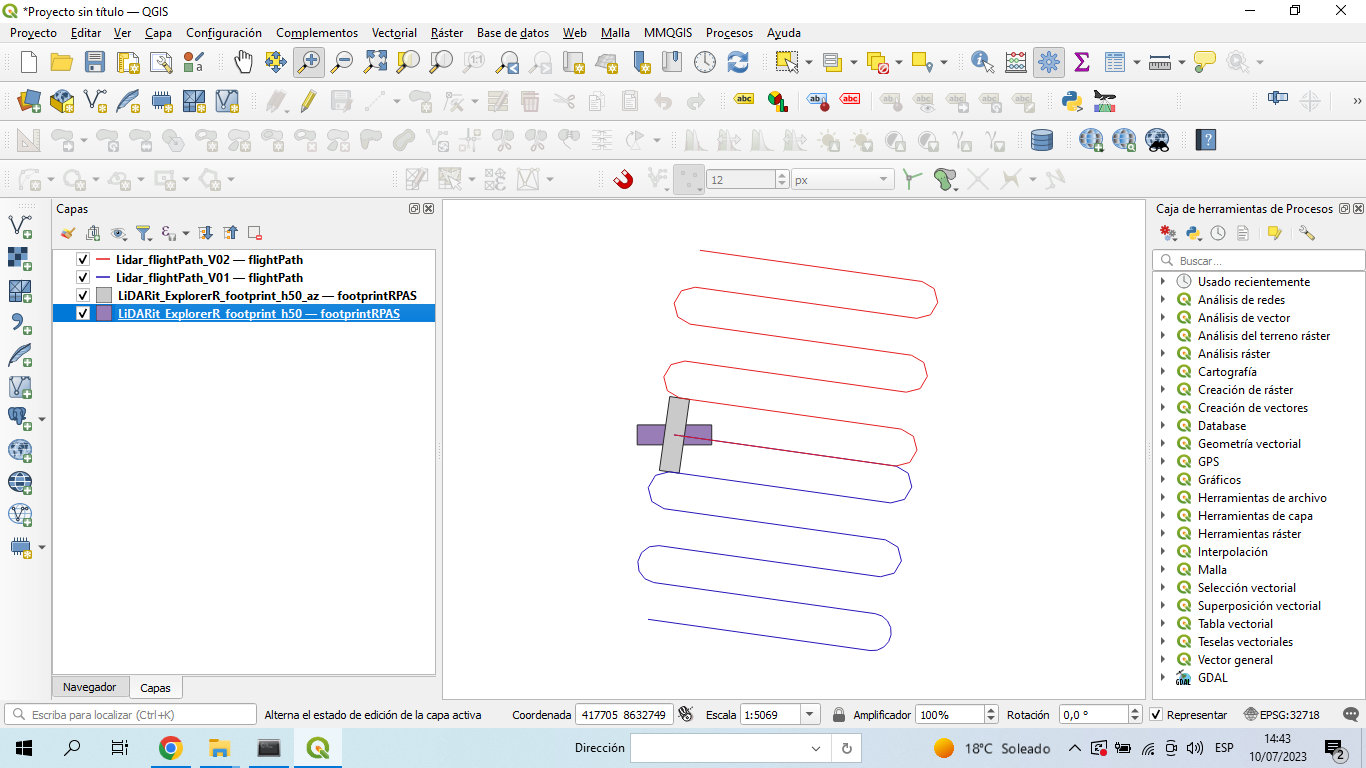

# YellowScan

Parametros del sensor YellowScan Mapper con el scanner Livox Horizon 

In [16]:
v_fov = 25.1 # degree
h_fov = 81.7 # degree
PRF = 240000 # pulses per second, (320 kHz)
h = 50 # Average flying height over ground, (m)
v = 5 # Flying speed over ground, (m/s)

YellowScan_Mapper = fp.LidarUAV(v_fov, h_fov, PRF)

In [17]:
vect_path = repo_path / 'Vector' / 'YellowScan_Mapper_footprint_h50_az.gpkg'
YellowScan_Mapper.polygonFootprint(str(vect_path), crs18Sepgs, *YellowScan_Mapper.rotateCorners(azimuth, *YellowScan_Mapper.cornersCoordinates(h, E, N)))

Area (m**2) :  1924.9139946129872
Centroids coordinates x,y :  417900.00000000006 8632705.000000002


(417900.00000000006, 8632705.000000002)

<bound method NDFrame.head of           Area                                           geometry
0  1924.913995  POLYGON Z ((417917.039 8632746.265 0.000, 4179...>
EPSG:32718


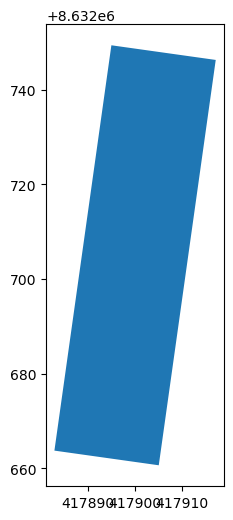

417900.00000000006 8632705.0
-12.367387007032503 -75.75520414944395


In [18]:
gdf = gpd.read_file(vect_path)
print(gdf.head)
print(gdf.crs)
gdf.plot(figsize=(6, 6))
plt.show()

from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:32718", "EPSG:4326")
print(loc_cent_e, loc_cent_n)

lat, lon = transformer.transform(loc_cent_e, loc_cent_n)
print(lat, lon)

m = folium.Map(location=[lat, lon], zoom_start=20)

# Add custom basemaps
basemaps['Google Satellite'].add_to(m)

# Use WGS 84 (epsg:4326) as the geographic coordinate system
gdf = gdf.to_crs(epsg=4326)
geo_j = gdf.to_json()
geo_j = folium.GeoJson(data=geo_j)
folium.Popup(gdf["Area"]).add_to(geo_j)
print(geo_j)

geo_j.add_to(m)

# Display the map.
display(m)

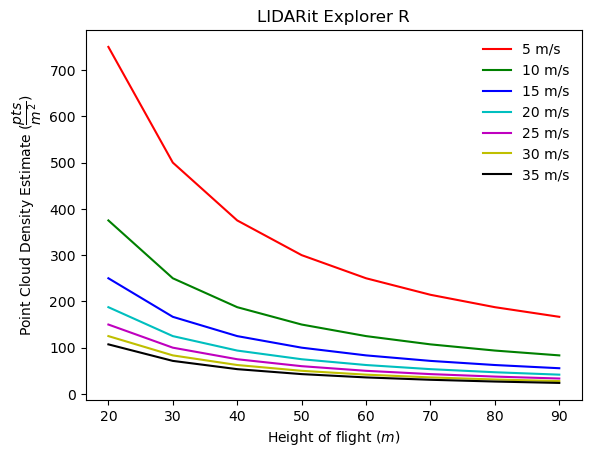

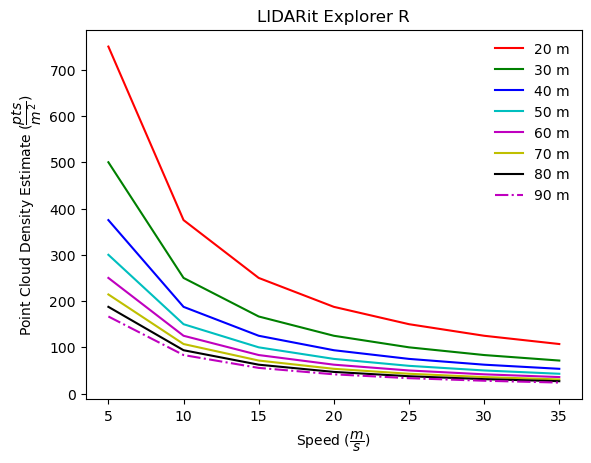

In [19]:
import numpy as np # package for matrix data structure
import pandas as pd # for data frame and analysis
import matplotlib.pyplot as plt # ploting

height_flight_m = np.arange(20, 100, 10)
speed_ms = np.arange(5, 36, 5)
point_density_v5 = [round(explorerR.pointCloudDensityEstimate(h, v), 2) for h in height_flight_m]
point_density_v10 = [round(explorerR.pointCloudDensityEstimate(h, 10), 2) for h in height_flight_m]
point_density_v15 = [round(explorerR.pointCloudDensityEstimate(h, 15), 2) for h in height_flight_m]
point_density_v20 = [round(explorerR.pointCloudDensityEstimate(h, 20), 2) for h in height_flight_m]
point_density_v25 = [round(explorerR.pointCloudDensityEstimate(h, 25), 2) for h in height_flight_m]
point_density_v30 = [round(explorerR.pointCloudDensityEstimate(h, 30), 2) for h in height_flight_m]
point_density_v35 = [round(explorerR.pointCloudDensityEstimate(h, 35), 2) for h in height_flight_m]


# data
df = pd.DataFrame({'h':height_flight_m, 'pcd_v5m':point_density_v5, 'pcd_v10m':point_density_v10, 
                   'pcd_v15m':point_density_v15, 'pcd_v20m':point_density_v20, 'pcd_v25m':point_density_v25, 
                   'pcd_v30m':point_density_v30, 'pcd_v35m':point_density_v35})
df

# Object Oriented plot
fig = plt.figure()
ax = plt.axes()
ax.plot(df['h'], df['pcd_v5m'], '-r', label='5 m/s');
ax.plot(df['h'], df['pcd_v10m'], '-g', label='10 m/s');
ax.plot(df['h'], df['pcd_v15m'], '-b', label='15 m/s');
ax.plot(df['h'], df['pcd_v20m'], '-c', label='20 m/s');
ax.plot(df['h'], df['pcd_v25m'], '-m', label='25 m/s');
ax.plot(df['h'], df['pcd_v30m'], '-y', label='30 m/s');
ax.plot(df['h'], df['pcd_v35m'], '-k', label='35 m/s');
ax.set_title('LIDARit Explorer R')
ax.set_xlabel('Height of flight $(m)$')
ax.set_ylabel('Point Cloud Density Estimate $(\dfrac{pts}{m^{2}})$')
ax.legend(loc='upper right', frameon=False)


fig = plt.figure()
ax = plt.axes()
ax.plot(speed_ms, df.iloc[0,1:8], '-r', label='20 m');
ax.plot(speed_ms, df.iloc[1,1:8], '-g', label='30 m');
ax.plot(speed_ms, df.iloc[2,1:8], '-b', label='40 m');
ax.plot(speed_ms, df.iloc[3,1:8], '-c', label='50 m');
ax.plot(speed_ms, df.iloc[4,1:8], '-m', label='60 m');
ax.plot(speed_ms, df.iloc[5,1:8], '-y', label='70 m');
ax.plot(speed_ms, df.iloc[6,1:8], '-k', label='80 m');
ax.plot(speed_ms, df.iloc[7,1:8], '-.m', label='90 m');
ax.set_title('LIDARit Explorer R')
ax.set_xlabel('Speed $(\dfrac{m}{s})$')
ax.set_ylabel('Point Cloud Density Estimate $(\dfrac{pts}{m^{2}})$')
ax.legend(loc='upper right', frameon=False)
